In [3]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.preprocessing import image
import os
import matplotlib.pyplot as plt
import cv2

In [4]:
image_dims = 128
batch_size = 64

In [5]:
model = Sequential()

model.add(Conv2D(64 , (3,3) , activation = 'relu' , input_shape= (image_dims, image_dims, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64 , (3,3) , activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64 , (3,3) , activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid'))

c:\Users\nteja\OneDrive\Desktop\Boot_camp\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,681,537 (6.41 MB)

 Trainable params: 1,681,537 (6.41 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [8]:
input_path = 'C:/Users/nteja/Downloads/Pnemonia/chest_xray/'

# Generate Training data:
training_data_generator = ImageDataGenerator(rescale = 1./255,
                          shear_range = 0.2,
                          zoom_range = 0.2,
                          horizontal_flip= True)

training_gen = training_data_generator.flow_from_directory(directory=input_path+'train',
target_size=(image_dims,image_dims),
                             batch_size=batch_size,
                             class_mode='binary')

Found 5216 images belonging to 2 classes.


In [9]:
validation_data_generator = ImageDataGenerator(rescale= 1./255)

validation_gen = validation_data_generator.flow_from_directory(directory= input_path+ 'val',
                             target_size=(image_dims,image_dims),
                             batch_size= batch_size,
                             class_mode= 'binary')

Found 16 images belonging to 2 classes.


In [12]:
epochs = 10
history = model.fit(training_gen,
             steps_per_epoch= 10,
             epochs = epochs,
             validation_data=validation_gen,
             validation_steps= validation_gen.samples)

c:\Users\nteja\OneDrive\Desktop\Boot_camp\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.5638 - loss: 0.6456 - val_accuracy: 0.5000 - val_loss: 0.7482
Epoch 2/10


c:\Users\nteja\OneDrive\Desktop\Boot_camp\venv\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.7331 - loss: 0.5906 - val_accuracy: 0.5000 - val_loss: 0.7988
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.7395 - loss: 0.5403 - val_accuracy: 0.5625 - val_loss: 0.8903
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 53s 5s/step - accuracy: 0.8033 - loss: 0.4490 - val_accuracy: 0.8125 - val_loss: 0.4595
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - accuracy: 0.8452 - loss: 0.3749 - val_accuracy: 0.6250 - val_loss: 0.9586
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.8948 - loss: 0.3238 - val_accuracy: 0.6875 - val_loss: 0.5951
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 42s 5s/step - accuracy: 0.8935 - loss: 0.2632 - val_accuracy: 0.8125 - val_loss: 0.3168
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - accuracy: 0.8918 - loss: 0.2734 - val_accuracy: 0.9375 - val_loss: 0.2582
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 432ms/step - accuracy: 0.9445 - loss: 0.1671 - val_accuracy: 0.7500 - val_loss: 0.4982
E

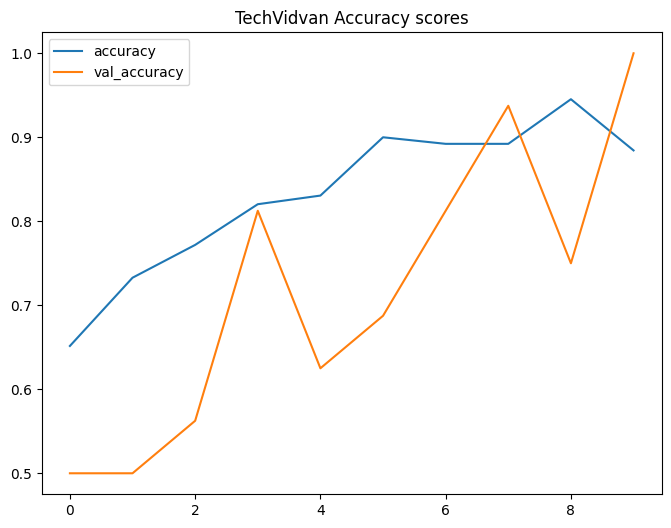

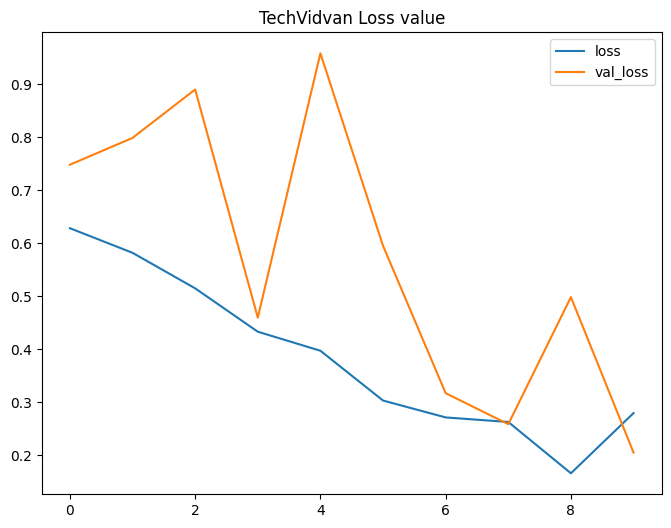

In [13]:
plt.figure(figsize=(8,6))
plt.title('TechVidvan Accuracy scores')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

plt.figure(figsize=(8,6))
plt.title('TechVidvan Loss value')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

In [16]:
test_data_generator = ImageDataGenerator(rescale = 1/255)

test_gen = test_data_generator.flow_from_directory(directory = input_path + 'test',
  target_size = (image_dims, image_dims),
  batch_size = 128,
  class_mode = 'binary'
)

eval_result = model.evaluate(test_gen, steps = 624)
print('loss rate at evaluation data :', eval_result[0])
print('accuracy rate at evaluation data :', eval_result[1])

Found 624 images belonging to 2 classes.


c:\Users\nteja\OneDrive\Desktop\Boot_camp\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  5/624 ━━━━━━━━━━━━━━━━━━━━ 24:38 2s/step - accuracy: 0.8701 - loss: 0.3036

c:\Users\nteja\OneDrive\Desktop\Boot_camp\venv\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


624/624 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.8495 - loss: 0.3364
loss rate at evaluation data : 0.3366653323173523
accuracy rate at evaluation data : 0.8493589758872986
